# Myers-Briggs Personality Classification with ML algorithms

#### This notebook includes following steps:
* Exploratory Data Analysis
* Data Cleaning
* Data Preprocessing
* Model Creation
* Model Training
* Model Evaluation and Selection


### Importing Libraries

In [4]:
!pip install contractions

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

### Load Dataset

In [47]:
df = pd.read_csv("../data/mbti_1.csv")
df.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

#### some information about dataset

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [51]:
df.describe()

type                                              posts
count   8675                                               8675
unique    16                                               8675
top     INFP  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq    1832                                                  1

### Class Distribution

In [53]:
_classes = df.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [54]:
def show_class_distribution(df, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=df, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_11724\3439723611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)


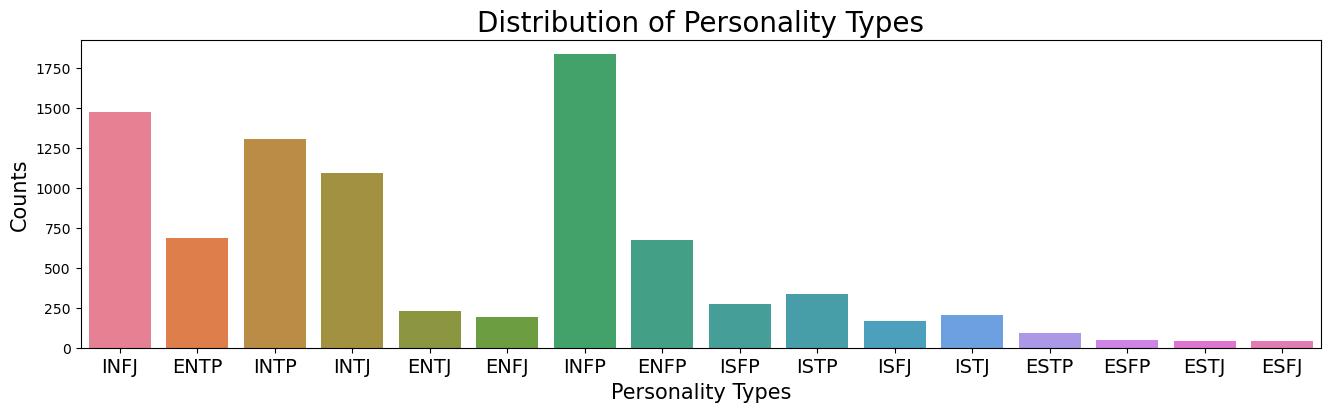

In [55]:
show_class_distribution(df, xticks_size=14)

In [56]:
def divide_types(df):
    # Add the new columns for each type
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    
    # Iterate over each row and update the new columns
    for index, row in df.iterrows():
        df.at[index, "E-I"] = "E" if row["type"][0] == "E" else "I"
        df.at[index, "N-S"] = "N" if row["type"][1] == "N" else "S"
        df.at[index, "F-T"] = "F" if row["type"][2] == "F" else "T"
        df.at[index, "J-P"] = "J" if row["type"][3] == "J" else "P"
        
    return df

# Apply the function to the dataframe
df = divide_types(df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_11724\3439723611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)


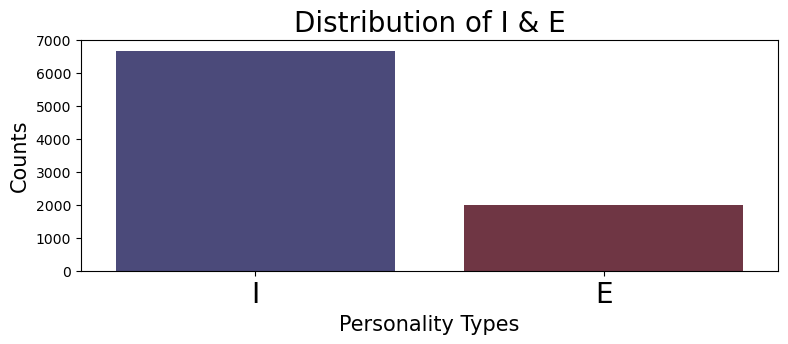

In [57]:
show_class_distribution(df, x="E-I", title="Distribution of I & E", figsize=(9,3), xticks_size=20, palette="icefire")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11724\3439723611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)


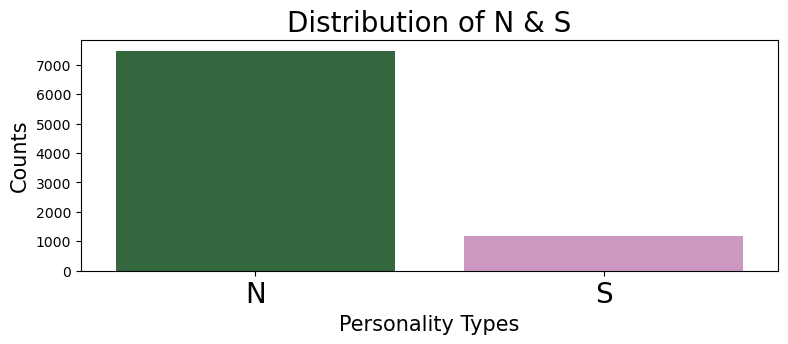

In [58]:
show_class_distribution(df, x="N-S", title="Distribution of N & S", figsize=(9,3), xticks_size=20, palette="cubehelix")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11724\3439723611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)


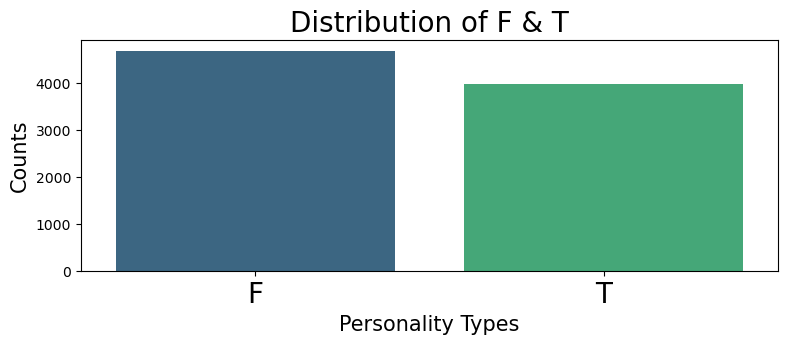

In [59]:
show_class_distribution(df, x="F-T", title="Distribution of F & T", figsize=(9,3), xticks_size=20, palette="viridis")

C:\Users\Dell\AppData\Local\Temp\ipykernel_11724\3439723611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=df, palette=palette)


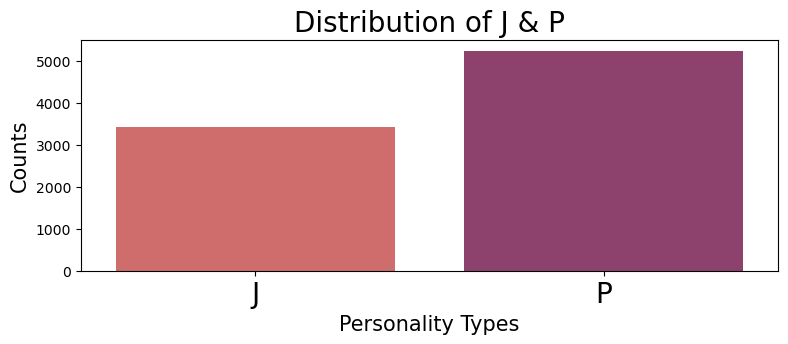

In [60]:
show_class_distribution(df, x="J-P", title="Distribution of J & P", figsize=(9,3), xticks_size=20, palette="flare")


In [61]:

df.loc[7, "posts"]

"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called  'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it.  Old unused software? ill take that off your hands :) i have a bunch of old adobe...|||i think its quite normal, i tend to only see my friends in real life every couple of months, as said earlier some people just dont get it but the good ones do :)  Edit: i mostly mean tolerate it...|||where do we go when we sleep? is dreaming another form of being awake? how many more layers of this are there if any?   thoughts about sleep keep me up at night  Edit: sometimes im too scared...|||thanks|||i wish i was free to follow my interests as i desired  i feel as though wishes are meant for impossible things|||by seeing do you mean visual interpreting or seeing as in mentally understanding the concept?|||hello|||

### Cleaning

In [63]:
def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

data = fix_contractions(df)
     

In [64]:
def clean_data(df, column_name = "cleaned_post"):
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: " ".join([word for word in x.split() if not len(word) <3]))
    return df

df = clean_data(df)


#### cleaned post

In [66]:
df.loc[7,"cleaned_post"]

'tend build collection things desktop that use frequently and then move them into folder called everything from there get sorted into type and sub type ike collect odd objects even work lot people would call junk but like collect old unused software ill take that off your hands have bunch old adobe think its quite normal tend only see friends real life every couple months said earlier some people just not get but the good ones edit mostly mean tolerate where when sleep dreaming another form being awake how many more layers this are there any thoughts about sleep keep night edit sometimes too scared thanks wish was free follow interests desired feel though wishes are meant for impossible things seeing you mean visual interpreting seeing mentally understanding the concept hello feel though incapable creating anything and wish could cannot stand the interviewer christ that laugh intj hmmm would interesting see intj this show doubt they would that interesting the general public though know

## Word count

In [68]:
df["words_count"] = df["cleaned_post"].apply(lambda x: len(x.split()))
df.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  
0  and intj moments sportscenter not top ten play...          454  
1  finding the lack these posts very alarming sex...          874  
2  good one course which say know that blessing a...          653  
3  dear intp enjoyed our conversation the other d...          820  
4  you are fired that another silly misconception...          782

## Visualizing the word count

In [70]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)

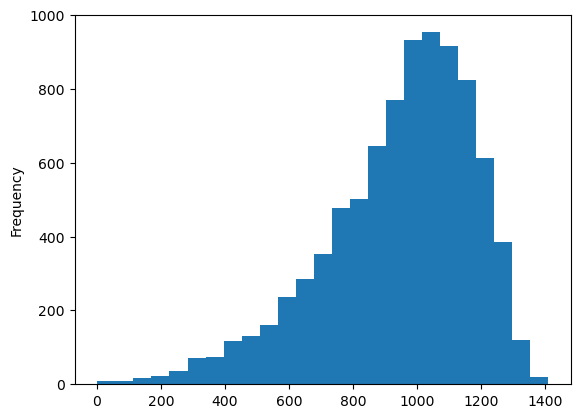

In [71]:
plot_counts(df, column="words_count", xlabel="Words Count")

## Character count

In [73]:
df["char_count"] = df["cleaned_post"].apply(lambda x: len(x))
df.head(5)

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  
0  and intj moments sportscenter not top ten play...          454        2764  
1  finding the lack these posts very alarming sex...          874        5104  
2  good one course which say know that blessing a...          653        4000  
3  dear intp enjoyed our conversation the other d...          820        4938  
4  you are fired that another silly misconception...          782        4692

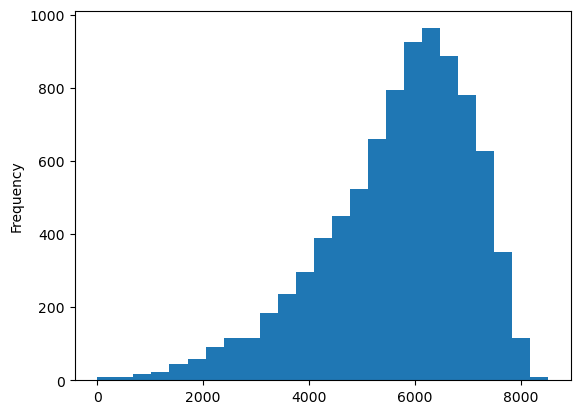

In [74]:
plot_counts(df, column="char_count", xlabel="Character Count")

### Most Frequent Words

In [76]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
stopword_list = stopwords.words("english")

In [78]:
def get_most_frequent(df, stop_words, column="cleaned_post", top=25):
    df = df[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [79]:
most_frequents = get_most_frequent(df, stopword_list)
most_frequents[:10]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337)]

In [80]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)    
    plt.figure(figsize=(16,4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="slateblue")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 20)
    plt.show()

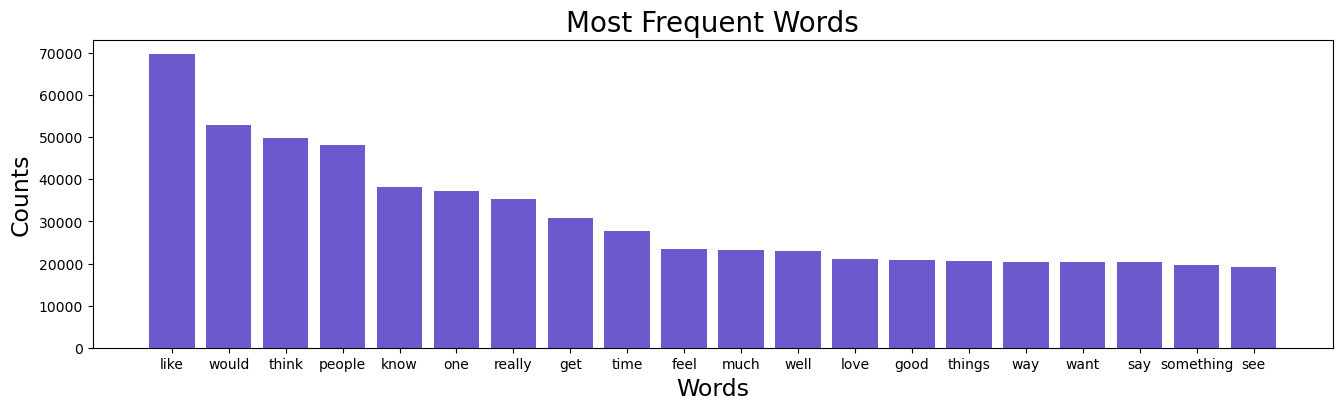

In [81]:
show_most_frequents(most_frequents)

### WordClouds

In [83]:
def show_wordcloud(df, stopword_list, column="cleaned_post"):
    fig = plt.figure(figsize=(15,5))
    wordcloud = WordCloud(background_color="black", min_font_size=5, stopwords=stopword_list).generate(df[column].to_string())
    plt.axis("off")
    plt.imshow(wordcloud)
    plt.show()

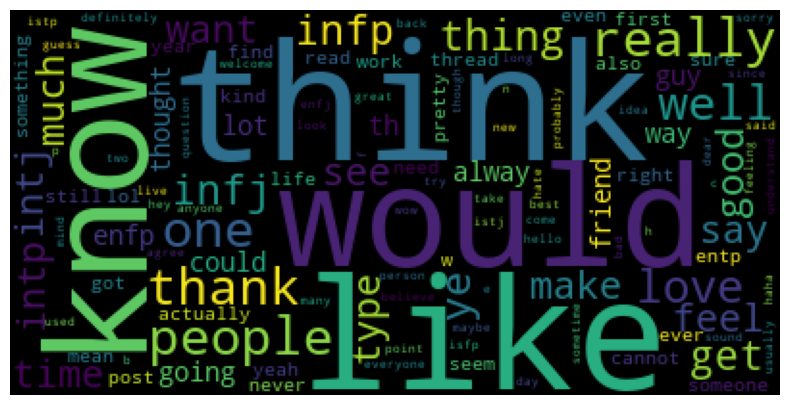

In [84]:
show_wordcloud(data, stopword_list)

In [85]:
def show_sub_wordclouds(df, type_column, column, size, fig_size=(20,15)):
    classes = df[type_column].unique()
    fig, ax = plt.subplots(len(classes), figsize=fig_size)
    j = 0
    for _class in classes:
        temp = df[df[type_column] == _class]
        wordcloud = WordCloud(background_color="black").generate(temp[column].to_string())
        plt.subplot(*size, j+1)
        plt.title(_class, size=25)
        plt.imshow(wordcloud)
        plt.axis("off")
        j+=1

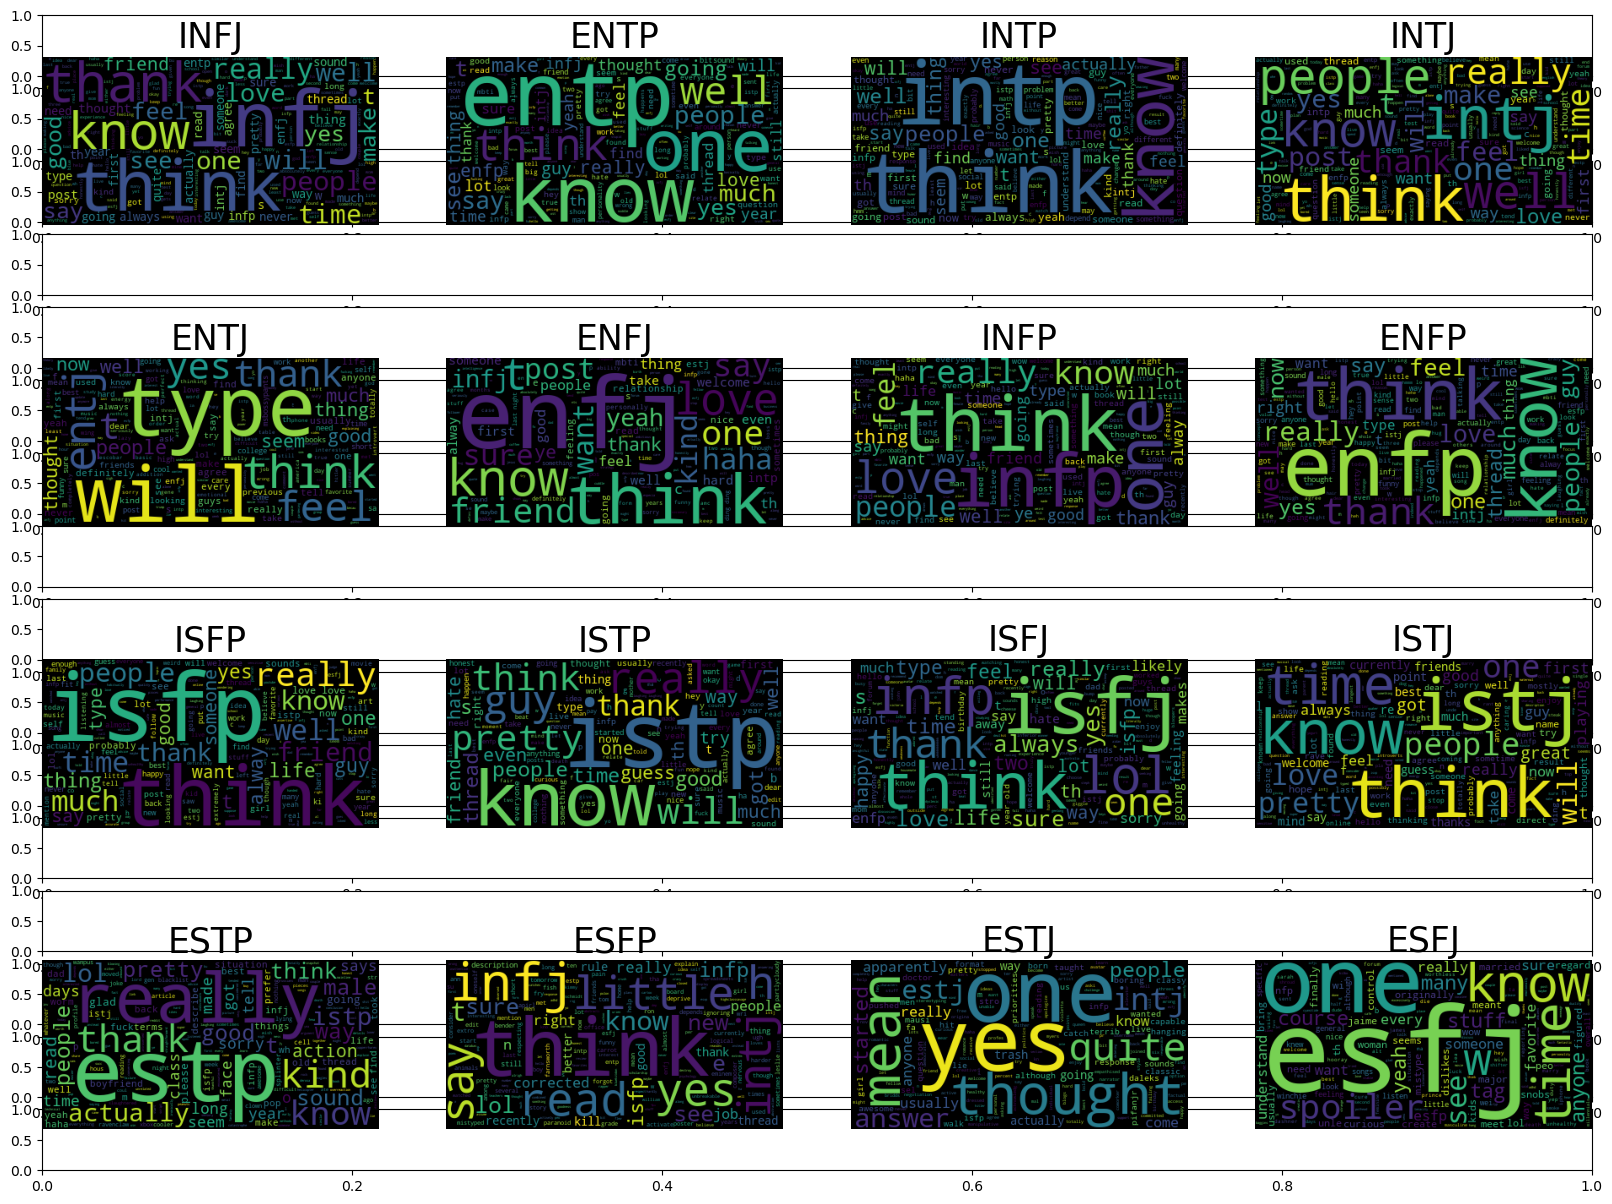

In [86]:
show_sub_wordclouds(df, type_column="type" , column="cleaned_post", size=(4,4))

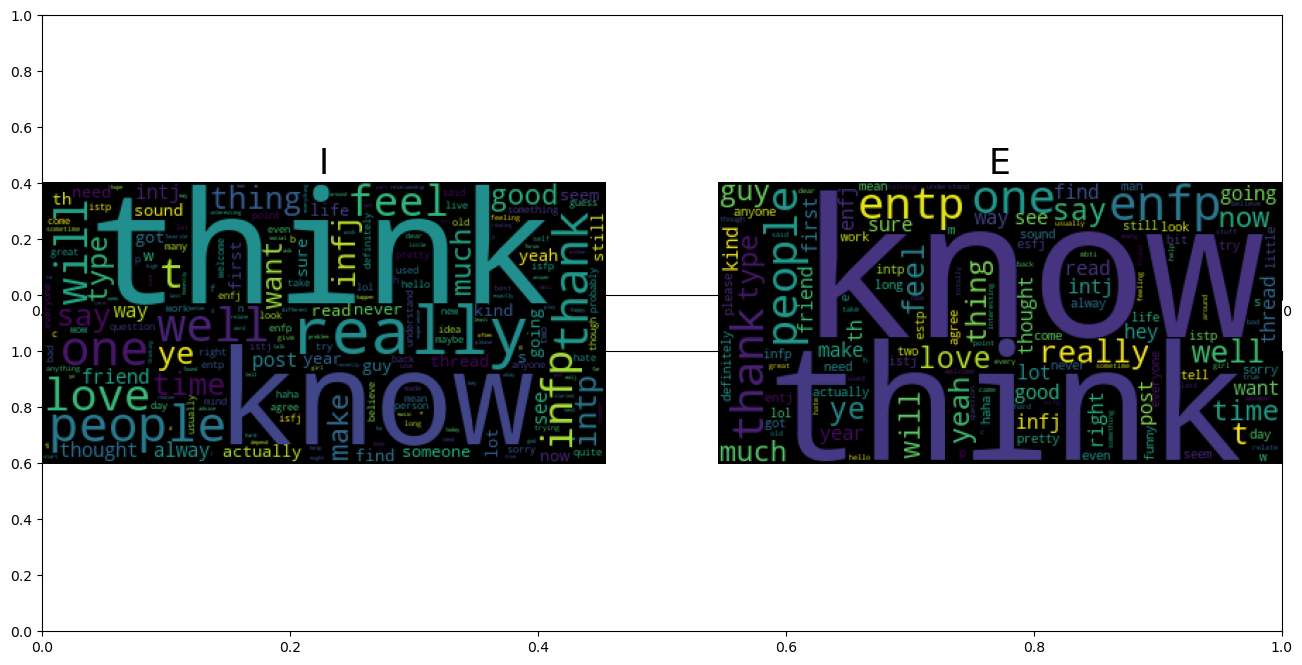

In [87]:
show_sub_wordclouds(df, type_column="E-I" , column="cleaned_post", size=(1,2), fig_size=(16,8))

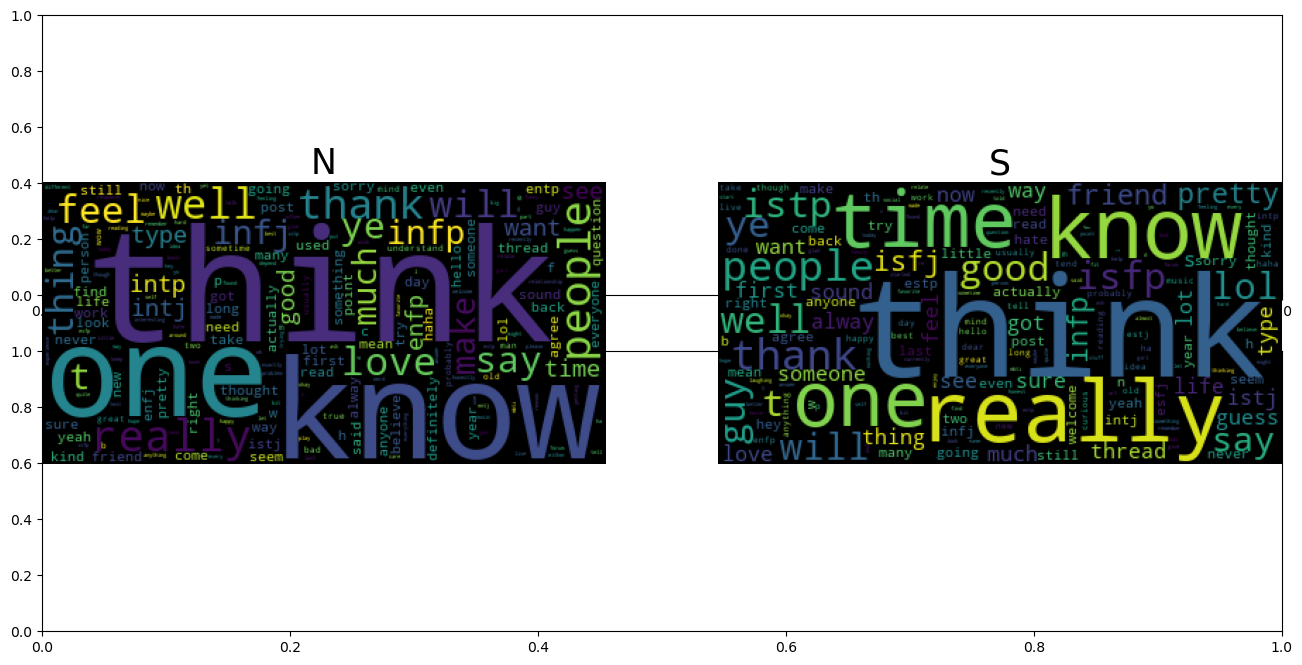

In [88]:
show_sub_wordclouds(df, type_column="N-S" , column="cleaned_post", size=(1,2), fig_size=(16,8))

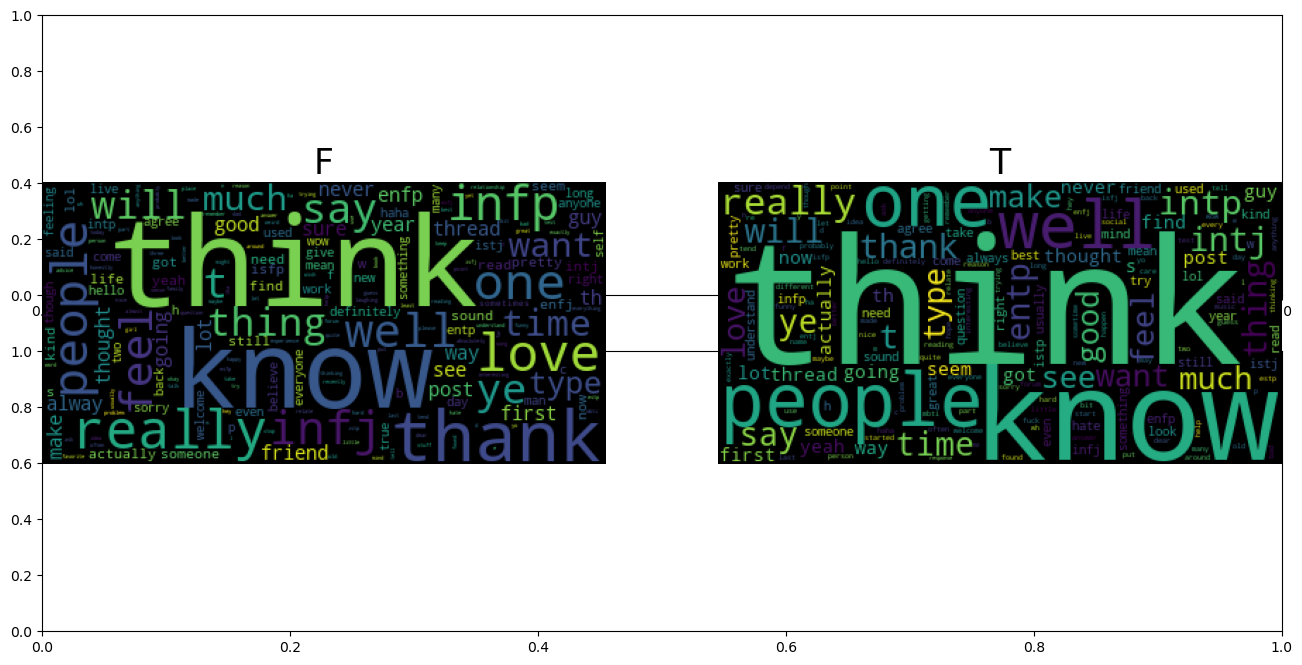

In [89]:
show_sub_wordclouds(df, type_column="F-T" , column="cleaned_post", size=(1,2), fig_size=(16,8))

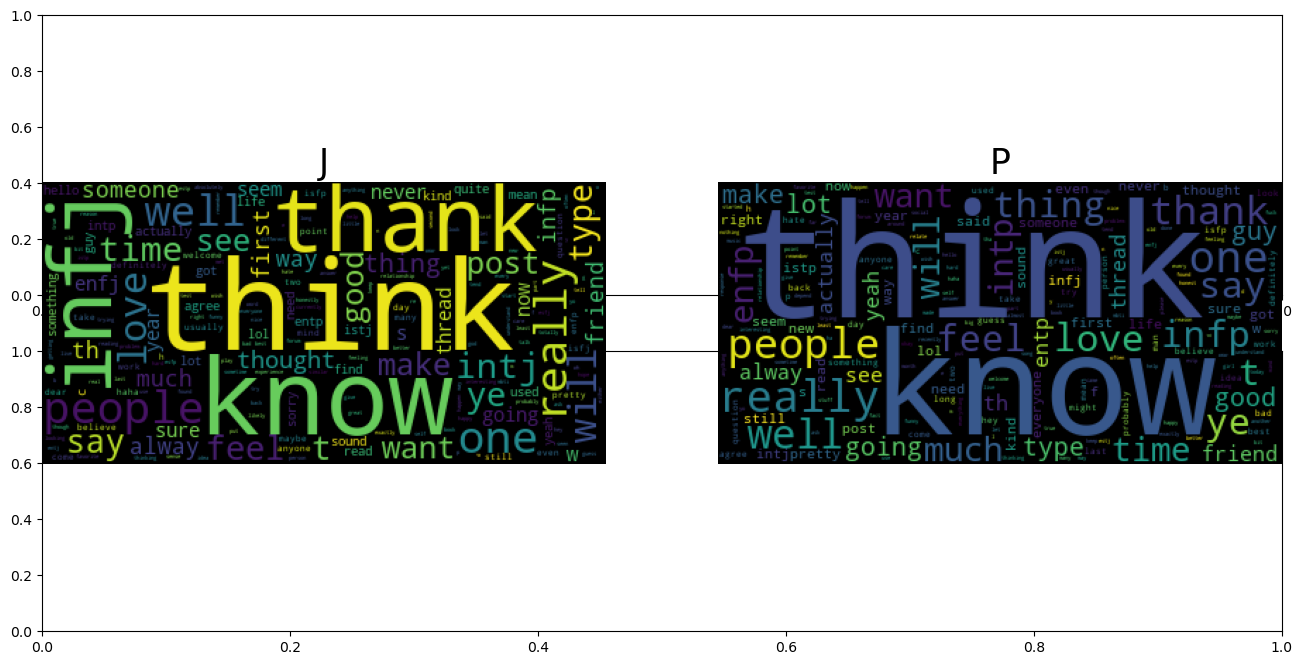

In [90]:
show_sub_wordclouds(df, type_column="J-P" , column="cleaned_post", size=(1,2), fig_size=(16,8))

### N-Grams

In [92]:
def get_ngrams(df, n_gram, new_column, column="cleaned_post"):
    df["tokenized"]  = df[column].apply(lambda x: x.split())
    df["sw_removal"] = df["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    df[new_column]   = df["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    df.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return df

In [93]:
df= get_ngrams(df, n_gram=2, new_column="bigrams")
df.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  
0  [(intj, moments), (moments, sportscenter), (sp...  
1  [(finding, lack), (lack, posts), (posts, alarm...  
2  [(good, one), (one, course), (course, say), (s...  
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...  
4  [(fired, another), (another, silly), (silly, m...

In [94]:
df = get_ngrams(df, n_gram=3, new_column="trigrams")
df.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  and intj moments sportscenter not top ten play...          454        2764   
1  finding the lack these posts very alarming sex...          874        5104   
2  good one course which say know that blessing a...          653        4000   
3  dear intp enjoyed our conversation the other d...          820        4938   
4  you are fired that another silly misconception...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

In [95]:
def most_common_ngram(df, column, top=20):
    temp = []
    for index, row in df.iterrows():
        temp += row[column]
    most_common = Counter(temp).most_common(top)
    return most_common

In [96]:
def plot_n_grams(ngrams, title, top=20):
    ngram_df = pd.DataFrame(ngrams)
    ngram_df.iloc[:, 0] = ngram_df.iloc[:,0].astype(str)
    plt.figure(figsize=(7,7))
    plt.barh(y=ngram_df.iloc[:top, 0], width=ngram_df.iloc[:top, 1])
    plt.xlabel("Counts", size=17)
    plt.ylabel("Pairs", size=17)
    plt.title(title, size = 20)
    plt.show() 

In [97]:
bigrams_most_common = most_common_ngram(data, "bigrams")
bigrams_most_common

[(('feel', 'like'), 5642),
 (('would', 'say'), 4073),
 (('would', 'like'), 3429),
 (('sounds', 'like'), 2606),
 (('pretty', 'much'), 2409),
 (('high', 'school'), 2216),
 (('even', 'though'), 1922),
 (('seems', 'like'), 1902),
 (('best', 'friend'), 1692),
 (('really', 'like'), 1576),
 (('think', 'would'), 1573),
 (('get', 'along'), 1551),
 (('years', 'ago'), 1460),
 (('long', 'time'), 1459),
 (('using', 'tapatalk'), 1376),
 (('personality', 'type'), 1337),
 (('someone', 'else'), 1272),
 (('many', 'people'), 1270),
 (('something', 'like'), 1267),
 (('people', 'think'), 1219)]

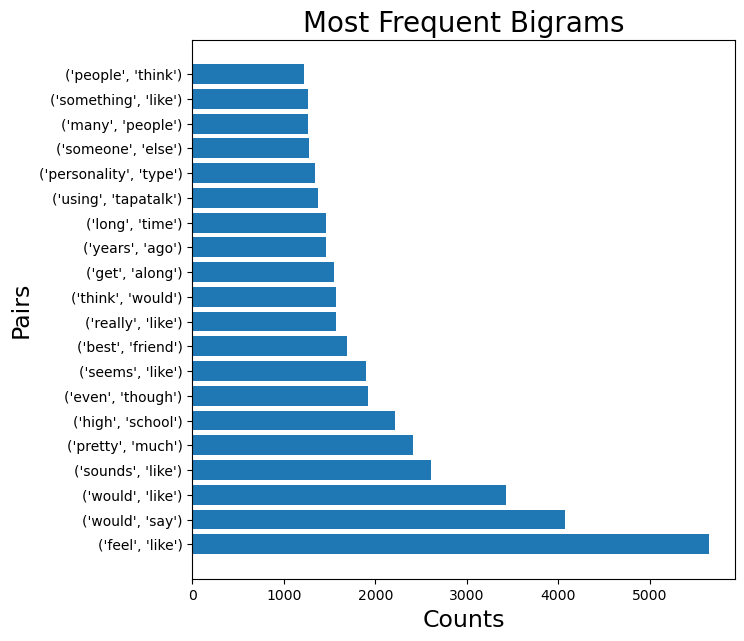

In [98]:
plot_n_grams(bigrams_most_common, title="Most Frequent Bigrams")

In [99]:
trigrams_most_common = most_common_ngram(data, "trigrams")
trigrams_most_common

[(('sent', 'iphone', 'using'), 702),
 (('iphone', 'using', 'tapatalk'), 686),
 (('sent', 'using', 'tapatalk'), 331),
 (('one', 'best', 'friends'), 280),
 (('get', 'along', 'well'), 253),
 (('sometimes', 'feel', 'like'), 207),
 (('would', 'like', 'know'), 192),
 (('long', 'time', 'ago'), 183),
 (('low', 'self', 'esteem'), 173),
 (('anything', 'may', 'affect'), 173),
 (('may', 'affect', 'way'), 171),
 (('affect', 'way', 'answer'), 168),
 (('yes', 'yes', 'yes'), 168),
 (('spend', 'lot', 'time'), 165),
 (('wikipedia', 'free', 'encyclopedia'), 162),
 (('way', 'answer', 'questions'), 158),
 (('answer', 'questions', 'example'), 150),
 (('questions', 'example', 'stressful'), 145),
 (('example', 'stressful', 'time'), 144),
 (('stressful', 'time', 'mental'), 140)]

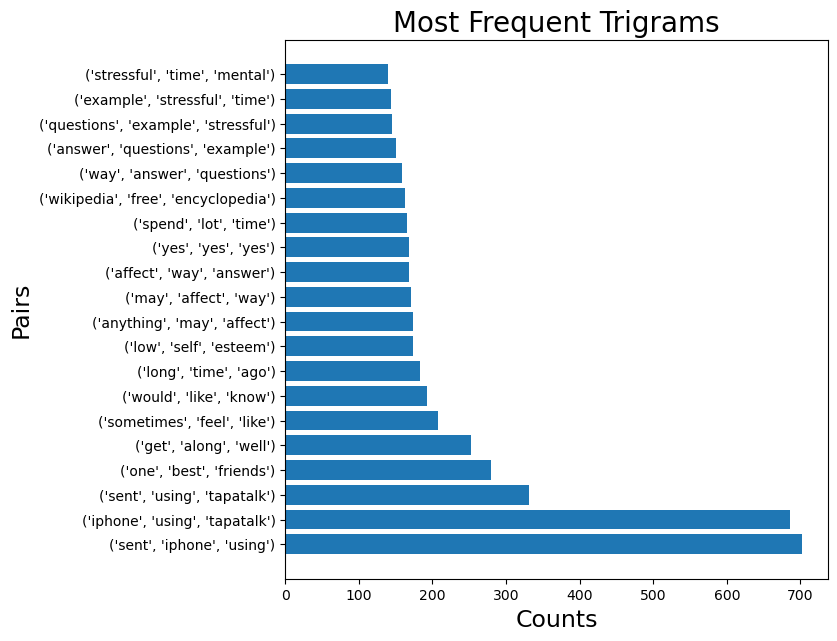

In [100]:
plot_n_grams(trigrams_most_common, title="Most Frequent Trigrams")

### preprocessing

In [102]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
def remove_stopwords(df, stopword_list, column="cleaned_post"):
    df[column] = df[column].apply(word_tokenize)
    df[column] = df[column].apply(lambda x: [word for word in x if not word in stopword_list])
    return df

In [104]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [105]:
def lemmatize(df, stopword_list, column="cleaned_post"):
    df[column] = df[column].apply(apply_lemmatization)
    df[column] = df[column].apply(" ".join)
    return df

In [106]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
df = remove_stopwords(df, stopword_list)

In [108]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [109]:
df = lemmatize(df, stopword_list)

In [110]:
df.head()

type                                              posts E-I N-S F-T J-P  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   I   N   F   J   
1  ENTP  'I'm finding the lack of me in these posts ver...   E   N   T   P   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   I   N   T   P   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   I   N   T   J   
4  ENTJ  'You're fired.|||That's another silly misconce...   E   N   T   J   

                                        cleaned_post  words_count  char_count  \
0  intj moment sportscenter top ten play prank li...          454        2764   
1  finding lack post alarming sex boring position...          874        5104   
2  good one course say know blessing curse absolu...          653        4000   
3  dear intp enjoyed conversation day esoteric ga...          820        4938   
4  fired another silly misconception approaching ...          782        4692   

                                             bigrams  \
0  [(intj, moments), (moments, sportscenter), (sp...   
1  [(finding, lack), (lack, posts), (posts, alarm...   
2  [(good, one), (one, course), (course, say), (s...   
3  [(dear, intp), (intp, enjoyed), (enjoyed, conv...   
4  [(fired, another), (another, silly), (silly, m...   

                                            trigrams  
0  [(intj, moments, sportscenter), (moments, spor...  
1  [(finding, lack, posts), (lack, posts, alarmin...  
2  [(good, one, course), (one, course, say), (cou...  
3  [(dear, intp, enjoyed), (intp, enjoyed, conver...  
4  [(fired, another, silly), (another, silly, mis...

## Modeling

C:\Users\Dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:53:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6582

Classification Report:
               precision    recall  f1-score   support

        ENFJ       0.62      0.24      0.35        41
        ENFP       0.65      0.63      0.64       125
        ENTJ       0.56      0.41      0.47        44
        ENTP       0.61      0.60      0.60       135
        ESFJ       0.50      0.14      0.22         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.33      0.14      0.20         7
        ESTP       0.67      0.40      0.50        15
        INFJ       0.64      0.65      0.65       288
        INFP       0.66      0.81      0.73       370
        INTJ       0.63      0.68      0.65       193
        INTP       0.70      0.76      0.73       293
        ISFJ       0.88      0.47      0.61        45
        ISFP       0.60      0.47      0.53        53
        ISTJ       0.85      0.52      0.65        44
        ISTP       0.71      0.54      0.61        67

    accuracy                          

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


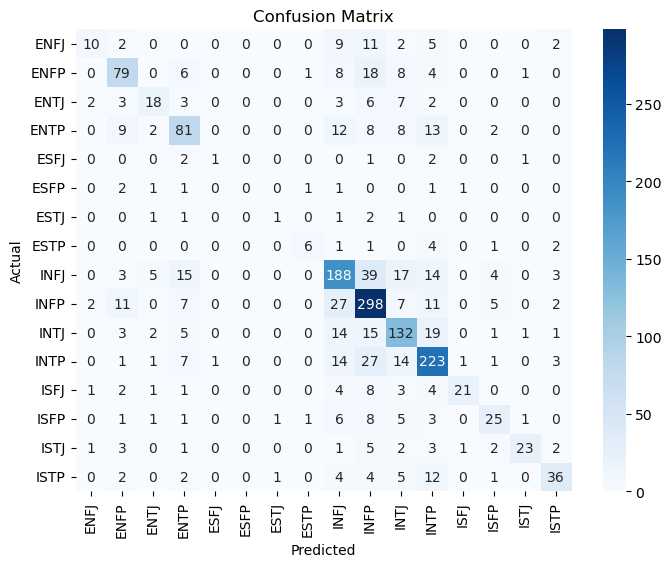

In [112]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data


# Text Cleaning Function
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\|\|\|', ' ', text)  # Remove ||| separators
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase and strip spaces
    return text

# Apply Cleaning
df['cleaned_post'] = df['posts'].astype(str).apply(clean_text)

# Convert Personality Types into Numeric Labels
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Splitting Data
X = df['cleaned_post']
y = df['type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert Text to Features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Using 5000 most frequent words
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Model Training with XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Accuracy and Classification Report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## Lightbgm

In [114]:
print(X_train.shape) 

(6940,)


In [115]:
import lightgbm as lgb

# Model Training with LightGBM
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test_tfidf)

# Accuracy and Classification Report
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print("\nClassification Report (LightGBM):\n", classification_report(y_test, y_pred_lgb, target_names=label_encoder.classes_))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.313856 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539355
[LightGBM] [Info] Number of data points in the train set: 6940, number of used features: 5000
[LightGBM] [Info] Start training from score -3.841111
[LightGBM] [Info] Start training from score -2.535139
[LightGBM] [Info] Start training from score -3.613948
[LightGBM] [Info] Start training from score -2.535139
[LightGBM] [Info] Start training from score -5.289709
[LightGBM] [Info] Start training from score -5.156178
[LightGBM] [Info] Start training from score -5.379321
[LightGBM] [Info] Start training from score -4.540992
[LightGBM] [Info] Start training from score -1.770094
[LightGBM] [Info] Start training from score -1.557496
[LightGBM] [Info] Start training from score -2.044887
[LightGBM] [Info] Start training from score -1.926362
[LightGBM] [Info] Start training from score -4.049267
[Light

## Catboost

In [117]:
from catboost import CatBoostClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train CatBoost
cat_model = CatBoostClassifier(iterations=200, learning_rate=0.05, depth=6, verbose=0, random_state=42)

cat_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_cat = cat_model.predict(X_test_tfidf)

# Convert to integer labels if necessary
y_pred_cat = y_pred_cat.astype(int)

# Accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Accuracy: {accuracy_cat:.4f}")

# Classification Report
print("\nClassification Report (CatBoost):\n", classification_report(y_test, y_pred_cat, target_names=label_encoder.classes_))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost")
plt.show()


SyntaxError: unmatched ')' (882168868.py, line 7)